We are trying to solve <br>
$\frac{\partial u}{\partial x} = A\frac{\partial^{2} u}{\partial z^{2}} + F(x,z)u$<br><br>
Using Crank Nicolson, this becomes (eq 3.15, [Fuhse thesis](https://ediss.uni-goettingen.de/bitstream/handle/11858/00-1735-0000-0006-B592-3/fuhse.pdf?sequence=1%20fuhse%20thesis)) : <br>
$B^{n}u^{n+1} = d^{n}$ <br>
where, $u^{n}$ denotes the wave at the nth plane, $B^{n}$ is an n by n tridiagonal matrix, and $d^{n}$ is related to $u^{n}$<br><br>
Define: <br>
$r_{z} = A\frac{\Delta x}{\Delta z^{2}}$<br>
$C^{n+\frac{1}{2}}_{k} = \frac{F^{n+\frac{1}{2}}_{k}\Delta x}{2}$<br>
$A = \frac{-i}{2k}$<br>
$F(x,y,z) = -1*\frac{ik}{2}(n^{2}(x,y,z)-1)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib
from skimage.restoration import unwrap_phase
from scipy.signal import gaussian
from xwp.finite_diff_1d import finite_diff_1d_free_space
np.set_printoptions(2)

/home/sajid/miniconda3/envs/ipy3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
π = np.pi
E = 10000
λ = (1239.84/E)*1e-9
k = ((2*π)/λ)
A = -1j/(2*k)

In [3]:
dim_x = 25000
dim_z = 25000
z = np.linspace(-4e-6,4e-6,dim_z)
x = np.linspace(0,5e-3,dim_x)
Δx = x[1] - x[0]
Δz = z[1] - z[0]
X,Z = np.meshgrid(x,z)
r_z = A * (Δx/(Δz)**2) 
coords = [x[0]*1e6,x[-1]*1e6,z[0]*1e6,z[-1]*1e6]

In [4]:
#wave = np.array(gaussian(dim_z,100),dtype=np.complex128)
wave = np.zeros(dim_z,dtype=np.complex128)
loc_wave = np.where(np.logical_and(z<0.5e-6,z>-0.5e-6))
wave[loc_wave] = 1
#θ = 4e-3
#loc_wave = np.where(wave!=0)
#slope = np.exp(1j*2*np.pi*(1/λ)*np.tan(θ)*z[loc_wave])
#wave[loc_wave] = wave[loc_wave]*slope
d = np.zeros(dim_z-2,dtype=np.complex128)
wave_history = np.zeros((dim_z,dim_x),dtype=np.complex128)

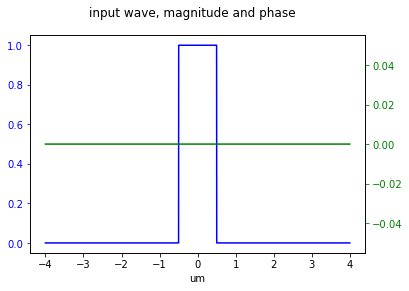

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(z*1e6,np.abs(wave),'b')
ax2.plot(z*1e6,unwrap_phase(np.angle(wave)),'g')
fig.suptitle('input wave, magnitude and phase')
ax1.set_xlabel('um')
ax1.tick_params('y', colors='b')
ax2.tick_params('y', colors='g')
plt.show()

In [6]:
finite_diff_1d_free_space(dim_x,dim_z,r_z,wave,wave_history)

100%|██████████| 25000/25000 [09:03<00:00, 45.96it/s]


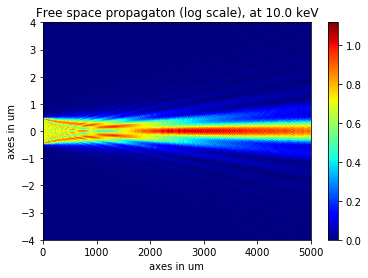

In [7]:
plt.imshow(np.log(np.abs(wave_history[:,:])**2+1),origin='lower',aspect='auto',extent=coords,cmap='jet')
plt.colorbar()
plt.xlabel('axes in um')
plt.ylabel('axes in um')
plt.title('Free space propagaton (log scale), at '+str(round(E*1e-3,3))+' keV')
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

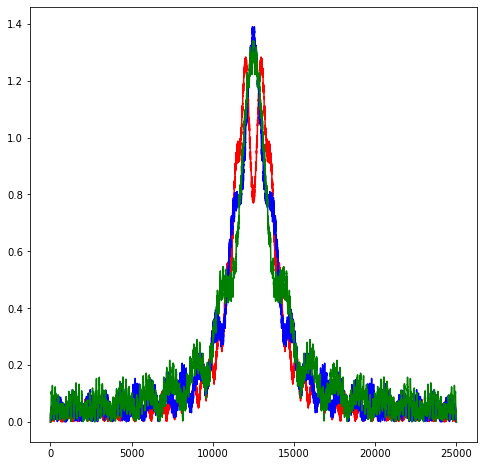

In [8]:
plt.plot(np.abs(wave_history[:,int(dim_x/4)]),'r')
plt.plot(np.abs(wave_history[:,int(dim_x/2)]),'b')
plt.plot(np.abs(wave_history[:,int(dim_x*3/4)]),'g')
plt.show()